# Lekce 5

## Statistická rozdělení a testování statistických hypotéz

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

### Kvantily

Čast používaný pojem ve statistice je kvantil. Vraťme se k našim datům o cukrovce a mediánu. Medián je číslo, pro které platí, že polovina hodnot v daném souboru je menší a polovina je větší. Podobné číslo bychom ale našli i pro jiná procenta. Uvažujme například tzv. dolní kvartil. Jedná se číslo, pro které platí, že 25 % hodnot v soubou je menších (a tím pádem 75 % je větších). Pro horní kvartil je to naopak, 75 % je menších a 25 % větších. Obecně takovým číslům říkáme **kvantil** (*quantile*).

Na grafu vidíme:

- Medián (čára uprostřed).
- Kvartily (tvorí barevný obdelník, dolní hranice obdelníku je dolní kvartil a horní hranice obdélníku horní kvartil).
- Poslední jsou čáry označené jako `whis` (od slova whisker - kočičí vousy). Ty zobrazují rozsah ještě větší části hodnot. Nastavme ho tak, aby označoval 90 % všech hodnot, tj. hodnoty mezi 5%ním a 95%ním kvantilem.

Z grafu je zřejmé, že "obdélník" u pacientek s cukrovkou je vyšší. Je tedy možné, že nemoc ovlivňuje množství glokózy v krvi pacientek tak, že je více různorodé.

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Outcome', ylabel='BloodPressure'>

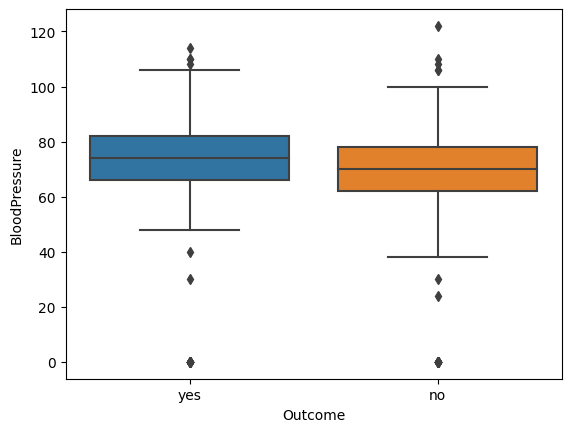

In [2]:
data = pd.read_csv("diabetes.csv")
labels = {0: "no", 1: "yes"}
data["Outcome"] = data["Outcome"].map(labels)
sns.boxplot(data, x="Outcome", y="BloodPressure")

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Outcome', ylabel='BloodPressure'>

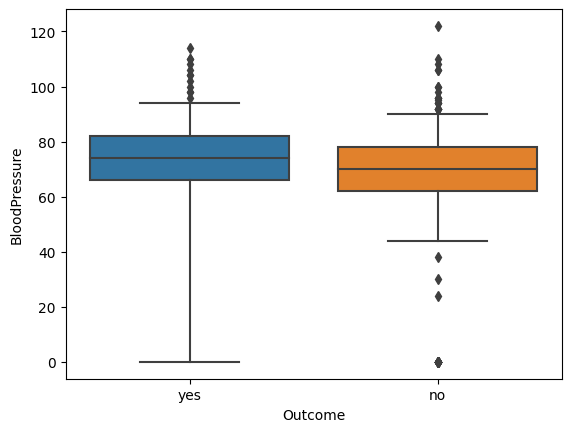

In [3]:
sns.boxplot(data, x="Outcome", y="BloodPressure", whis=[5, 95])

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Outcome', ylabel='BloodPressure'>

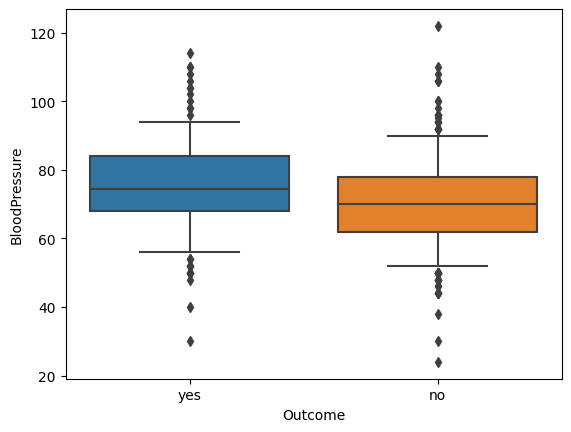

In [4]:
data = data[data["BloodPressure"] > 0]
sns.boxplot(data, x="Outcome", y="BloodPressure", whis=[5, 95])

Hodnoty kvantilů si můžeme nechat zobrazit jako čísla s využitím funkce `quantile()`.

In [5]:
data_yes = data[data["Outcome"] == "yes"]
np.quantile(data_yes["BloodPressure"], 0.25)

68.0

In [6]:
np.quantile(data_yes["BloodPressure"], 0.75)

84.0

Nyní víme, že krevní tlak u 50 % pacientek s cukrovkou se pohybuje mezi 68 a 84.

### Funkce hustoty

Vraťme se k nyní histogramu, se kterým jsme se seznámili na první lekci. Histogram je graf, který se skládá ze sloupců. V případě krevního tlaku vidíme na vodorovné ose hodnoty krevního tlaku a výška sloupce udává, kolik žen má hodnotu krevního tlaku v daném intervalu.

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BloodPressure', ylabel='Count'>

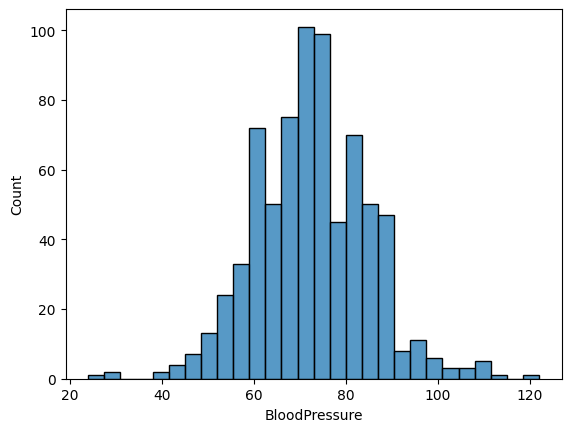

In [7]:
sns.histplot(data=data, x="BloodPressure")

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BloodPressure', ylabel='Count'>

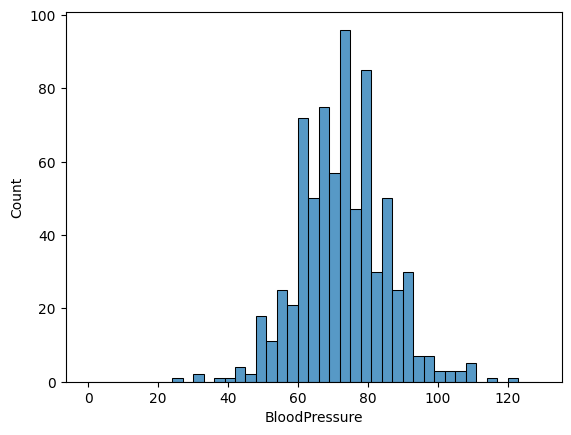

In [8]:
sns.histplot(data=data, x="BloodPressure", bins=range(0, 130, 3))

Použijme nyní funkci `displot` a nastavme parametr `kde=True`. Nyní v grafu vidíme i čárku, která je označovaná jako funkce hustoty (*density function*). Funkci hustoty můžeme použít podobě jako histogram, ale s tím rozdílem, že funkce hustoty nám "prozradí" procento hodnot, které se nachází v libovolném intervalu.

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


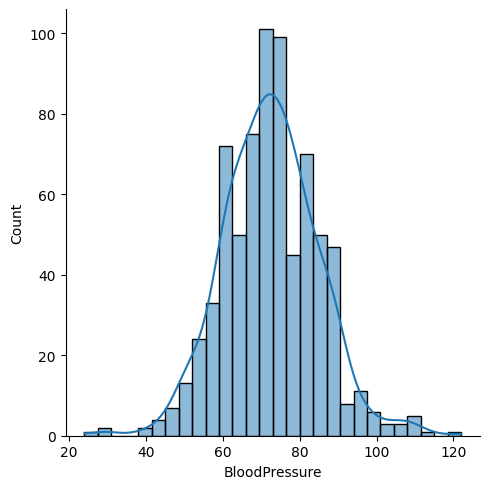

In [9]:
sns.displot(data=data, x="BloodPressure", kde=True)

Funkci hustoty můžeme sestrojit (odhadnout) z nějakých dat. Existují ale tzv. statistická rozdělení (*statistical distribution*), což jsou v podstatě vzorečky pro funkci hustoty. 

Většina funkcí hustoty má parametry, pomocí kterých můžeme měnit tvar nebo polohu funkce. Nejznámějším statistickým rozdělením je **normální (Gaussovo) rozdělení** (*normal distribution*). Normální rozdělení má spousta "jevů", které se vyskytují v přírodě, například délka, výška nebo hmotnost živé tkáně atd. Používá se také ve financích na oceňování některých cenných papírů. Normální rozdělení mají často i chyby měření při experimentech.

![](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

Normální rozdělení má dva parametry - střední hodnotu a rozptyl. Střední hodnota určuje, kde se nachází vrchol distribuční funkce, a rozptyl určuje "šířku" distribuční funkce. Rozptyl tedy říká, jak daleko jsou hodnoty rozptýlené od střední hodnoty.

*Poznámka*: Hustota normáního rozdělení má dvě důležité vlastnosti:

- Je symetrická. To, jak je rozdělení symetrické, měříme pomocí ukazatele označovaného jako šikmost (*skewness*).
- Normální rozdělení má relativně málo "odlehlých pozorování". Platí pravidlo "6 sigma". Pokud bychom vytvořili interval, kde minimum je střední hodnota rozdělení minus 3 směrodatné odchylky (*sigma*) a maximum je střední hodnota rozdělení plus 3 směrodatné odchylky, obsahuje tento interval přes 99 % hodnot. Toto měříme pomocí ukazatele označovaného jako špičatost (*kurtois*).

Kromě normálního existuje řada dalších statistických rozdělení.

### Testy na normální rozdělení

Teoreticky je možné, že nějaká data, se kterými pracujeme, mají normální rozdělení. To se může často hodit. Některé statistické metody totiž mají **předpoklady**, které by měly být splněny, než je použijeme. Pokud nejsou předpoklady splněné, je vhodné použít alternativu. Například některé statistické testy hypotéz jsou označovány jako parametrické (*parametric*) a jiné jako neparametrické (*nonparametric*). Parametrické testy většinou předpokládají, že data mají normální rozdělení, neparametrické testy to nevyžadují.

Statistické testy jsou různě citlivé na odchylky od normality. Napříkald t-test je poměrně *robustní* a funguje dobře i pro data, která nemají normální rozdělení, pokud máme *dostatečné množství* dat (tj. minimálně vyšší desítky). Jiné testy jsou bohužel citlivější a v případě jejich využití bychom mohli dojít k nesprávnému závěru ohledně platnosti nulové hypotézy.

Pokud nevíme, zda jsou předpoklady splněné, můžeme je otestovat. Testování předpokladů probíhá stejně, jako v případě samotného testu zkoumaného problému. Začneme tedy formulací hypotéz. V případě, že testujeme, zda mají data normální rozdělení (často se říká "normalita data"), formulujeme hypotézy takto:

- H0: Data mají normální rozdělení.
- H1: Data nemají normální rozdělení.

K otestování můžeme využít řadu testů. Součásti `scipy` je několik testů. Například funcke `normaltest()` kombinuje D'Agostinův a Pearsonův test. Proveďme nyní test hypotézy o středních hodnotách dvou souborů včetně ověření předpokladů. Nejprve tedy formulujeme hypotézu normality, otestujeme ji a na základě výsledku se rozhodneme, který test použít na otestování hypotézy o středních hodnotách.

Nyní se podívejme na data o marketingové propagaci fast-foodového řetězce ze serveru [kaggle.com](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test/data), která jsou uložená v souboru [WA_Marketing-Campaign.csv](WA_Marketing-Campaign.csv).

Budou nás zajímat tyto sloupce:

- `Promotion` - typ propagace, která byla pro daný obchod provedena (existují 2 možné hodnoty, tj. máme dvě různé marketingové kampaně).
- `SalesInThousands` - tržby v tisících.
- `MarketSize` - velikost trhu v dané lokalitě.

Formulujeme si hypotézy.

- H0: Střední hodnota tržeb pro oba typy propagace jsou stejné.
- H1: Střední hodnota tržeb pro typy propagace se liší.

Opět porovnáváme mezi sebou dva průměry (dvě střední hodnoty).

In [10]:
data = pd.read_csv("WA_Marketing-Campaign.csv")
data = data[data["week"] == 4]

Rozdělíme si data do samostatných tabulek. Abychom neměli data ovlivněné velikostí trhu v dané oblasti, budeme zkoumat pouze lokality s `MarketSize` `Medium`.

In [11]:
data = data[data["MarketSize"] == "Medium"]
data = data.reset_index()
data["Promotion"].value_counts()

Promotion
2    27
1    24
Name: count, dtype: int64

Vidíme, že tentokrát máme relativně málo dat, mnohem méně, než kolik jsme jich měli minule při testování krevního tlaku. Měli bychom tedy ověřit, že zda data normální rozdělení skutečně mají.

Data si rozdělíme do samostatných tabulek.

In [12]:
data_promotion_1 = data[data["Promotion"] == 1]
data_promotion_2 = data[data["Promotion"] == 2]

K testu normality můžeme použít například funkci `normaltest`, která kombinuje D'Agostinův a Pearsonův test.

Jak by vypadaly hypotézy pro tento test?

- H0: Data mají normální rozdělení.
- H1: Data nemají normální rozdělení.

In [13]:
stats.normaltest(data_promotion_1["SalesInThousands"])

NormaltestResult(statistic=0.8205090264294883, pvalue=0.6634813638704963)

In [14]:
stats.normaltest(data_promotion_2["SalesInThousands"])

NormaltestResult(statistic=0.46009553155047445, pvalue=0.7944956518962357)

Opět se orientujeme podle p-hodnoty. Ta je ve všech případech menší než 0.05, měli bychom nulovou hypotézu zamítnout. Dále tedy budeme postupovat s tím, že data nemají normální rozdělení.

Zamysleme se nyní nad výběrem vhodného testu. Shrňme si informace, které víme.

- Počet výběrů (souborů, *samples*): Porovnáváme mezi sebou dva různé výběry, tj. potřebujeme dvouvýběrový test.
- Porovnáváme střední hodnotu (průměr) výběrů.
- Naše data nemají normální rozdělení.
- Oba výběry jsou nezávislé, nejde o párová pozorování.

Předposlední bod nám znemožňuje použití t-testu. V přehledech statistických testů bychom našli alternativou k t-testu, která nevyžaduje normální rozdělení, a tou je Mann Whitney U test. Tento test nám nabízel i Chat GPT.

In [15]:
statistics, pvalue = stats.mannwhitneyu(data_promotion_1["Promotion"], data_promotion_2["Promotion"])
pvalue

1.6631617818603044e-12

Protože p-hodnota je menší než 0.05, na běžně používané hladině významnosti bychom nulovou hypotézu zamítli. Jinými slovy, prokázali jsme, že průměrné tržby v restauraci jsou ovlivněné typem reklamní kampaně.

### Čtení na doma: Test s jednostrannou alternativou

Nyní uvažujme situaci, že chceme porovnat dvě střední hodnoty, ale rádi bychom formulovali alternativní hypotézu se znaménkem menší než nebo větší než. Takovému testu říkáme jednostranný test (*one-tailed test* nebo *one-sided test*).

Uvažujme například data o platbách pojišťovny za pojištěnce ze serveru [kaggle.com](https://www.kaggle.com/datasets/nazeernazeer/insurance-dataset-for-statistical-analysis). Budou nás zajímat především dva sloupce.

- `smoker` - Jde o kuřáka (kuřačku) či nekuřáka (nekuřačku)?
- `charges` - Platby za pojištěnce.

Platí, že hypotézu bychom měli formulovat dříve, než se podíváme na samotná data, protože data (a hlavně zjištěné průměry) by neměly testování ovlivnit. Pokud nemáme před testováním důvod pro jednostrannou alternativu, je potřeba použít oboustranný test.

V našem případě se budeme zabývat vlivem kouření na platby za zdravotní péči za pojištěnce. Obecně je známo, že kouření bohužel může zvýšit pravděpodobnost některých zdravotních problémů. Je tedy reacionální předpokládat, že platby za kuřáky (kuřačky) by mohly být v průměru vyšší než platby za nekuřáky (nekuřačky). V alternativní hypotéze tedy budeme uvažovat znaménko větší než.

- H0: Platy za kuřáky (kuřačky) jsou v průměru stejné jako platby za nekuřáky (nekuřačky).
- H1: Platy za kuřáky (kuřačky) jsou vyšší (*greater*) platby za nekuřáky (nekuřačky).

Jinak se na postupu nic nemění. Začneme tedy načtením dat.

In [16]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Od obou skupin máme dostatečné zastoupení v datech.

In [17]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Rozdělíme data na skupiny.

In [18]:
data_smokers = data[data["smoker"] == "yes"]
data_not_smokers = data[data["smoker"] == "no"]

Opět bychom mohli uvažovat o využití t-testu. Ověříme tedy normalitu dat.

In [19]:
stats.normaltest(data_smokers["charges"])

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [20]:
stats.normaltest(data_not_smokers["charges"])

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

Data nemají normální rozdělení, to nám ale nevadí, protože můžeme použít neparametrický Mann Whitney U test. Ten totiž podporuje jednostranný test, stejně jako ho podporuje t-test. Tentokrát ovšem již záleží na pořadí, ve kterém funci `mannwhitneyu` dáme data. To musí být v souladu s parametrem `alternative` a tím, jak máme definovanou naši alternativní hypotézu.

Data vložíme ve stejném pořadí jako je máme v alternativní hypotéze, tj. nejprve `data_smokers` a poté `data_not_smokers`. Nakonec přidáme hodnotu parametru `alternative`, která bude `greater`, což je znaménko z naší alternativní hypotézy.

In [21]:
_, pvalue = stats.mannwhitneyu(data_smokers["charges"], data_not_smokers["charges"], alternative="greater")

In [22]:
np.format_float_positional(pvalue)

'0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000026351167222517853'

Protože p-hodnota je menší než 0.05, prokázali jsme, že platby za kuřáky (kuřačky) naší pojišťovny jsou **vyšší** než platby za nekuřáky (nekuřačky).

## Přehled statistických testů v Pythonu

Tato část vám pomůže s výběrem vhodného testu pro vaše projekty.

Při výběru testu je možné použít i rozhodovací stromy, zde je příklad [jednoho z nich](strom_1.png). Zde [druhý](strom_2.png), poněkud složitější.

### Testy s jedním výběrem

Tyto testy porovnávají jeden výber (jeden sloupec tabulky) oproti nějaké skutečnosti.

#### Testy na průměr

Testy na průměr porovnávají průměr výběru s nějakou námi definovanou hodnotou. U testů na průměr můžeme alternativní hypotézu formulovat pomocí znaménka není rovno, menší než nebo větší než.

Níže jsou příklady dvojic hypotéz. Pro test hypotézy můžeme využít následující testy:

* [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp), který předpokládá, že data mají normální rozdělení.

* H0: Průměrná výška basketbalistek v České republice je 180 cm
* H1: Průměrná výška basketbalistek v České republice je více než 180 cm

In [23]:
import pandas
from scipy import stats

data = [170, 180, 175, 183, 178, 182, 185, 176, 179, 181]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 180)
print(res)

TtestResult(statistic=-0.7936270159024009, pvalue=0.44783036238501905, df=9)


* H0: Průměrná chyba při výrobě součástky do motoru je 0.1 mm
* H1: Průměrná chyba při výrobě součástky do motoru je méně než 0.1 mm

Zde v alternativní hypotéze říkáme to, že průměrná chyba je menší, proto využíváme parametr `alternative` (do něj píšeme stejné znaménko jako v alternativní hypotéze, tj. `less` nebo `greater`).

In [24]:
data = [0.12, 0.10, 0.11, 0.13, 0.09, 0.11, 0.12, 0.10, 0.11, 0.12]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 0.1, alternative="less")
print(res)

TtestResult(statistic=2.905487990874554, pvalue=0.9912805695458283, df=9)


* H0: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 je 5 minut
* H1: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 není 5 minut (tj. je méně nebo více než 5 minut)

In [25]:
data = [5.1, 4.9, 5.2, 4.8, 5.0, 5.1, 4.9, 5.2, 4.8, 5.0]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 0.1, alternative="less")
print(res)

TtestResult(statistic=103.94469683442252, pvalue=0.9999999999999982, df=9)


#### Testy na rozdělení

Příklad hypotéz:

* H0: Ceny domů mají normální rozdělení
* H1: Ceny domů nemají normální rozdělení

Pro test hypotézy můžeme využít následující testy:

* [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)
* Kombinace D'Agostinova and Pearsonova testu, který provádí funkce [normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest).

In [26]:
data = [0.74590569, 1.74565776, 0.58570378, 0.95159044, 0.58572699, 1.20722768, 0.38527559, 1.70051498, 1.10369079, 1.18765377, 1.7503144, 
        0.40093026, 1.2216318,  1.45744714, 1.95942974, 1.08444009, 1.07266436, 0.88722675, 0.48954167, 1.50261749, 1.27005193, 1.026523, 1.44374599, 1.54176153, 0.51657773]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.shapiro(data["sloupec_1"])
res

ShapiroResult(statistic=0.9605264663696289, pvalue=0.42506101727485657)

In [27]:
res = stats.normaltest(data["sloupec_1"])
res

NormaltestResult(statistic=1.8353668908225964, pvalue=0.39944330233531283)

Pokud v hypotéze potřebujeme ověřit, zda data mají nějaké jiné rozdělení, můžeme použít [Kolmogorov-Smirnov test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest). Funkci dáváme jako parametr distribuční funkci (*cumulative distribution function*, CDF) rozdělení, se kterým chceme data srovnat. Test můžeme použít i pro normální rozdělení. Přehled rozdělení, která jsou v modulu `scipy` k dispozici, je [zde](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions).

In [28]:
data["sloupec_1"]
stats.kstest(data["sloupec_1"], stats.norm.cdf)

KstestResult(statistic=0.649983377679607, pvalue=7.563148425063538e-11, statistic_location=0.38527559, statistic_sign=-1)

### Testy se dvěma statistickými soubory

Tyto testy porovnávají dva různé statistické soubory.

#### Testy na průměr

U testu na průměr máme k dispozici poměrně hodně testů.

Uvažujme nejprve párová pozorování. Párovými pozorování myslíme, že **každému pozorování z jednoho souboru** můžeme **přiřadit jiné pozorování podle nějakého logického klíče**. Například uvažujme školení pracovníků pracující u výrobní linky. Pokud máme data o rychlosti montáže pracovníků před školením (tj. počet smontovaných výrobků za jednotku času) a po školení, můžeme použít párování, protože rychlost před školením a po školení pro jednoho pracovníka tvoří párové pozorování. Pokud bychom chtěli porovnat rychlost pracovníků v jiných směnách nebo jiných závodech, nejedná se o párová pozorování.

Příklad hypotéz:

* H0: Rychlost montáže pracovníků před školením byla stejná jako po školení
* H1: Rychlost montáže pracovníků před školením byla jiná než je po školení

Pro test hypotézy můžeme použít [párový t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel). Test předpokládá, že data mají normální rozdělení.

In [29]:
data = [
    [10.5, 12.2],  # Pracovník 1
    [9.8, 11.4],   # Pracovník 2
    [10.2, 11.7],  # Pracovník 3
    [10.1, 12.3],  # Pracovník 4
    [9.9, 11.6],   # Pracovník 5
    [10.6, 12.1],  # Pracovník 6
    [9.7, 11.9],   # Pracovník 7
    [10.3, 12.0],  # Pracovník 8
    [9.6, 11.8],   # Pracovník 9
    [10.4, 12.4],  # Pracovník 10
    [10.0, 12.5],  # Pracovník 11
    [9.5, 11.3],   # Pracovník 12
    [10.7, 12.6],  # Pracovník 13
    [9.4, 11.2],   # Pracovník 14
    [10.8, 12.7]   # Pracovník 15
]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.ttest_rel(data["sloupec_1"], data["sloupec_2"])
res

TtestResult(statistic=-25.03753938346132, pvalue=5.020951754927011e-13, df=14)

Pro nepárové testy můžeme mít následující hypotézy:

* H0: Rychlost montáže pracovníků v obou sledovaných směnách je stejná
* H1: Rychlost montáže pracovníků v obou sledovaných směnách je různá

Pro test hypotézy můžeme použít [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind). Test předpokládám, že data mají normální rozdělení. U testu existují dvě varianty - jedna předpokládá, že data mají stejný rozptyl, druhá uvažuje, že soubory mají různé rozptyly.

In [30]:
data = [
    [12.2, 12.4], # První pracovník směny 1 a první pracovník směny 2
    [11.4, 11.5], # Druhý pracovník směny 1 a druhý pracovník směny 2
    [11.7, 11.8], 
    [12.3, 12.2], 
    [11.6, 11.7], 
    [12.1, 12.3], 
    [11.9, 11.8], 
    [12.0, 12.1], 
    [11.8, 11.7], 
    [12.4, 12.5], 
    [11.9, 12.4], 
    [12.7, 11.4], 
    [10.3, 12.7], 
    [9.11, 11.3], 
    [12.5, 12.6]
    ]

data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.ttest_ind(data["sloupec_1"], data["sloupec_2"])
res

Ttest_indResult(statistic=-1.1295989413722716, pvalue=0.26822987045185975)

#### Testy na rozdělení

Testy na rozdělení umožňují porovnat, zda mají dva statistické soubory stejné rozdělení, tj. zda mají stejnou distrubuční funkci. Opět rozlišujeme párový a nepárový test.

Pro párový test můžeme formulovat hypotézy:

* H0: Rozdělení rychlosti montáže pracovníků po školení je stejná jako před školením
* H1: Rozdělení rychlosti montáže pracovníků po školení je jiná než před školením

Pro test můžeme použít [Wilcoxonův test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon). Test je neparametrický, tj. nevyžaduje normální rozdělení.

In [31]:
scaled_data = [
    [18.4, 11.7], # Pracovník 1
    [11.8, 14.0], # Pracovník 2
    [14.8, 8.7], # Pracovník 3
    [13.2, 12.5], # Pracovník 4
    [16.3, 12.3], # Pracovník 5
    [9.6, 11.9], # Pracovník 6
    [14.5, 8.4], # Pracovník 7
    [13.0, 10.4], # Pracovník 8
    [11.8, 15.7], # Pracovník 9
    [11.4, 13.6], # Pracovník 10
    [9.2, 9.8], # Pracovník 11
    [13.2, 11.5], # Pracovník 12
    [12.0, 9.9], # Pracovník 13
    [11.7, 12.9], # Pracovník 14
    [13.1, 11.2] # Pracovník 15
]

data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.wilcoxon(data["sloupec_1"], data["sloupec_2"])
res

WilcoxonResult(statistic=32.5, pvalue=0.12054443359375)

Pro nepárová pozorování můžeme formulovat hypotézy:

* H0: Rozdělení rychlosti montáže v obou sledovaných směnách jsou stejná
* H1: Rozdělení rychlosti montáže v obou sledovaných směnách jsou různá

Pro otestování můžeme použít [Mann–Whitney test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu). Test je neparametrický, tj. nevyžaduje normální rozdělení.

In [32]:
data = [
    [12.2, 12.4], # První pracovník směny 1 a první pracovník směny 2
    [11.4, 11.5], # Druhý pracovník směny 1 a druhý pracovník směny 2
    [11.7, 11.8], 
    [12.3, 12.2], 
    [11.6, 11.7], 
    [12.1, 12.3], 
    [11.9, 11.8], 
    [12.0, 12.1], 
    [11.8, 11.7], 
    [12.4, 12.5], 
    [11.9, 12.4], 
    [12.7, 11.4], 
    [10.3, 12.7], 
    [9.11, 11.3], 
    [12.5, 12.6]
    ]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.mannwhitneyu(data["sloupec_1"], data["sloupec_2"])
res

MannwhitneyuResult(statistic=99.0, pvalue=0.5889500869266057)

#### Testy závislosti kategoriálních dat

Kategoriální data jsou taková, která obecně není číslo, ale text (v řeči programování řetězec). Kategoriální proměnnou tedy může být oblíbený programovací jazyk, předmět na škole, nápoj, nejvyšší dosažené vzdělání, zda je člověk kuřák atd. Kategoriální proměnné můžeme porovnat mezi sebou a rozhodnout, zda je mezi nimi závislost.

Hypotézy mohou být například následující:

* H0: Oblíbený předmět nezávisí na pohlaví
* H1: Oblíbený předmět závisí na pohlaví

Pro test hypotézy můžeme použít [chí-kvadrát test nezávislosti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). Test je založený na použití kontingenční (pivot) tabulky.

In [33]:
data = [    
    ['female', 'coffee'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['female', 'tea'],
    ['female', 'coffee'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'tea'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'coffee'],
    ['female', 'juice'],
    ['female', 'tea'],
    ['female', 'coffee'],
    ['female', 'tea'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['male', 'tea'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'coffee'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['female', 'coffee'],
    ['female', 'coffee'],
    ['male', 'tea'],
    ['male', 'juice'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['female', 'juice'],
    ['male', 'coffee'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['female', 'tea'],
    ['male', 'juice'],
    ['female', 'juice'],
    ['female', 'tea'],
    ['male', 'juice'],
    ['male', 'coffee'],
    ['male', 'juice']
]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
# Pro použití testu musíme vytvořit kontingenční tabulku
data = pandas.pivot_table(data, "sloupec_1", "sloupec_1", "sloupec_2",aggfunc=len)
res = stats.chi2_contingency(data)
res

Chi2ContingencyResult(statistic=1.4818062200956932, pvalue=0.47668322366030635, dof=2, expected_freq=array([[9.95238095, 7.85714286, 4.19047619],
       [9.04761905, 7.14285714, 3.80952381]]))

#### Test statistické významnosti korelace

Test řeší, zda je zjištěná korelace statisticky významná. 

Uvažujme následující hypotézy:

- H0: Cena domu a obytná plocha domu nejsou statisticky závislé
- H1: Cena domu a obytná plocha domu jsou statisticky závislé

Pokud mají data normální rozdělení, lze využít test založený na [Pearsonově korelačním koeficientu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr). Pokud data nemají normální rozdělení, můžeme využít test s využitím [Spearmanova koeficientu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr) nebo [Kendallova tau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau).

Data použitá v ukázce jsou v souboru [house_prices.csv](house_prices.csv).

In [34]:
# Pearson 
# Takto zjistíme výsledek, i když na tato konkrétní data bychom test založení na Pearsonově koeficientu používat neměli, data nemají normální rozdělení.

data = pandas.read_csv("house_prices.csv")
res = stats.pearsonr(data["SalePrice"], data["GrLivArea"])
res

PearsonRResult(statistic=0.7205163006738732, pvalue=1.9398503205014947e-233)

In [35]:
# Spearman
data = pandas.read_csv("house_prices.csv")
res = stats.spearmanr(data["SalePrice"], data["GrLivArea"])
res

SignificanceResult(statistic=0.7312378789702222, pvalue=7.801875110918258e-244)

In [36]:
# Kendall tau
data = pandas.read_csv("house_prices.csv")
res = stats.kendalltau(data["SalePrice"], data["GrLivArea"])
res

SignificanceResult(statistic=0.543863812013887, pvalue=1.995410251143093e-211)

### Testy se třemi a více statistickými soubory

#### Test na průměr

Test na průměr umožňuje porovnat, zda jsou průměry hodnot různé u tří a více souborů.

Pro test můžeme formulovat hypotézy:

* H0: Průměrný čas montáže je stejný u pracovníků všech tří směn
* H1: Průměrný čas montáže různý alespoň dvě směny

Uvažujme, že máme ranní, odpolední a noční směnu. Test nám pouze řekne, zda je mezi směnami nějaký rozdíl, ale nevíme přesně jaký. Může tedy být například stejný průměr ranní a odpolední směny a noční se od nich liší, může být stejný průměr ranní a noční směny a odpolední se od nich liší nebo může mít každá směna průměr odlišný od ostatních.

Pokud mají všechny soubory normální rozdělení a stejný roptyl, můžeme použít [ANOVA test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway). Pokud data nemají normální rozdělení, je možné využít neparametrický [Kruskall-Wallis test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal).

### Test na rozptyl

Test na variabilitu umožňují porovnat variabilitu tří a více souborů. Lze je použít i k rozhodnutí, zda je vhodné použití testu ANOVA.

Pro test můžeme formulovat hypotézy:

- H0: Rozptyl času montáže je stejný u pracovníků všech tří směn
- H1: Rozptyl času montáže se liší alespoň pro dvě směny

Pokud mají všechny soubory normální rozdělení, můžeme použít Levenův test. Pokud data nemají normální rozdělení, je možné použít Bartlettův test.

# Cvičení

## Hodnocení hotelů

Stáhni si soubor [global_hotel_reviews.csv](global_hotel_reviews.csv). Naším úkolem je porovnat recenze ve Francii a Švýcarsku. Číselné hodnocení hotelů je ve sloupci `Rating` a obsahuje pouze hodnoty 2, 4, 6, 8 a 10. Země, kde se hotel nachází, je ve sloupci `Country`.

Nejprve si zobraz počty hodnocení hotelů jako sloupcový graf. Využij graf typu `countplot`, který jsme si ukazovali na první lekci. Pomocí parametru `hue` si zobraz samostatné sloupce pro oba státy. Dokážeš s dat odhadnout, která země bude mít vyšší průměrné hodnocení?

Dále si vytvoř dvě tabulky na základě sloupce `Country`. Jedna tabulka bude obsahovat recenze z Francie (`France`) a druhá ze Švýcarska (`Switzerland`). Spočítej průměrné hodnocení v obou zemích.

Nakonec porovnej, jestli je rozdíl mezi oběma zeměmi statisticky významný. Naše data mají zvláštní charakter (hodnocení jsou hodnoty 2, 4, 6, 8 a 10), je proto lepší využít Mann Whitney U test, protože tato data nebudou mít normální rozdělení.

Postupuj dle klasického scénáře: formuluj si hypotézy, urči p-hodnotu testu a nakonec formuluj závěr.

## Bonus: Platy akademiků

Stáhli si soubor [salaries-2022.csv](salaries-2022.csv), který obsahuje data o platech akademiků na univerzitě v belgickém Waterloo. Tvým úkolem je ověřit tvrzení, že s kariérním postupem vzroste akademickým pracovníkům a pracovnicím jejich průměrný plat. Konkrétně nám půjde o dvě pozice (sloupec `Position title`) - `Professor` a `Associate Professor` (obdoba české pozice docent(ka)). Protože profesor je vyšší pozice než docent, předpokládáme, že profesoři a profesorky by měi mít vyšší platy než docenti a docentky.

Zobraz si data, tentokrát s využitím histogramu. Tipni si, jestli data budou mít normální rozdělení. Především se zamysli nad tím, jestli jsou data symetrická. Poté ověř normalitu dat s využitím testu normality.

Na základě testu normality vyber vhodný ten pro ověření hypotézy o střední hodnotě. Formuluj nulovou a alternativní hypotézu, přičemž v alternativní hypotéze uvažuj jednostrannou variantu, že průměrný plat na pozici Professor je vyšší než na pozici Associate Professor. Do funkce pro vyhodnocení testu vlož parametr `alternative`. Nakonec na základě p-hodnoty rozhodni o zamítnutí nulové hypotézy.

### Nápověda ke zpracování dat

Pozor na to, že data o platech jsou v podivném formátu. Jsou tam čárky, které nefungují jako desetinné čárky, ale jako oddělovače tisíců. Pandas je z toho zmatený a myslí si, že data jsou řetězec. Je tedy třeba zbavit se čárky (k tomu může pomoci metoda replace, pouze pozor na to, že je třeba ji volat jako `.str.replace()`) a poté je třeba převést hodnotu na číslo s využitím metody `astype()` (do závorky dáme "cílový" datový typ).

Řádek se správným načtením je případně k dispozici v souboru [reseni.ipynb](reseni.ipynb).

# Další zdroje

- [One-Tailed Tests](https://www.methodspace.com/blog/one-tailed-tests)
- [When Can I Use One-Tailed Hypothesis Tests?](https://statisticsbyjim.com/hypothesis-testing/use-one-tailed-tests/)
